# Merging all the csv files for lake Sammamish

In [ ]:

import pandas as pd 

df_1 = pd.read_csv("../Resources_Ritu/0611_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_2 = pd.read_csv("../Resources_Ritu/0612_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_3 = pd.read_csv("../Resources_Ritu/0614_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_4 = pd.read_csv("../Resources_Ritu/0617_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_5 = pd.read_csv("../Resources_Ritu/0622_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_6 = pd.read_csv("../Resources_Ritu/0625_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_7 = pd.read_csv("../Resources_Ritu/M621_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)


WQI_df = df_1.append(df_2)
print(WQI_df.shape)
WQI_df.head()



In [2]:
# append multiple DataFrames

df_WQI_big = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7], ignore_index=True)
print(df_WQI_big.shape)
df_WQI_big.head()

(9513, 12)


,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1994-01-06,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,1994-01-06,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,1994-01-06,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,1994-01-06,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [3]:
# Create the output file (CSV)

output_data_file = "../Resources_Ritu/Big_lake_Sammamish.csv"

# Export the clean water quality data 

df_WQI_big.to_csv(output_data_file, index="CollectDate")

# Preprocessing the Data for Neural Network

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


#  Import and read the charity_data.csv.
import pandas as pd 
#WQI_df = pd.read_csv("../Resources_Ritu/0611_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

WQI_df.head()

,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1994-01-06,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,1994-01-06,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,1994-01-06,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,1994-01-06,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [5]:
# Data Summary

WQI_df.describe()

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
count,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000
mean,0.021665,104.551975,8.092862,1.705749,0.254388,0.004884,7.596716,11.370664,0.450505,0.016026,90.566439
std,0.022244,5.953239,3.676661,3.875605,0.123535,0.005195,0.686403,4.195563,0.117563,0.010593,36.263646
min,0.010000,83.200000,0.000000,0.000000,0.020000,0.002000,6.100000,5.400000,0.050000,0.005000,12.702527
25%,0.010000,101.800000,6.208500,0.000000,0.168167,0.002000,7.100000,8.300000,0.371000,0.009900,65.267760
50%,0.015167,104.035714,9.000000,0.000000,0.249833,0.003017,7.500000,10.100000,0.437833,0.014200,88.185042
75%,0.023667,108.000000,10.500000,1.000000,0.333200,0.006117,8.000000,13.568182,0.523167,0.018850,113.310884
max,0.359000,165.000000,124.400000,30.000000,0.804000,0.129000,9.700000,24.900000,1.250000,0.193000,261.984929


In [6]:
# convert string to datetime
WQI_df["CollectDate"] = pd.to_datetime(WQI_df["CollectDate"])

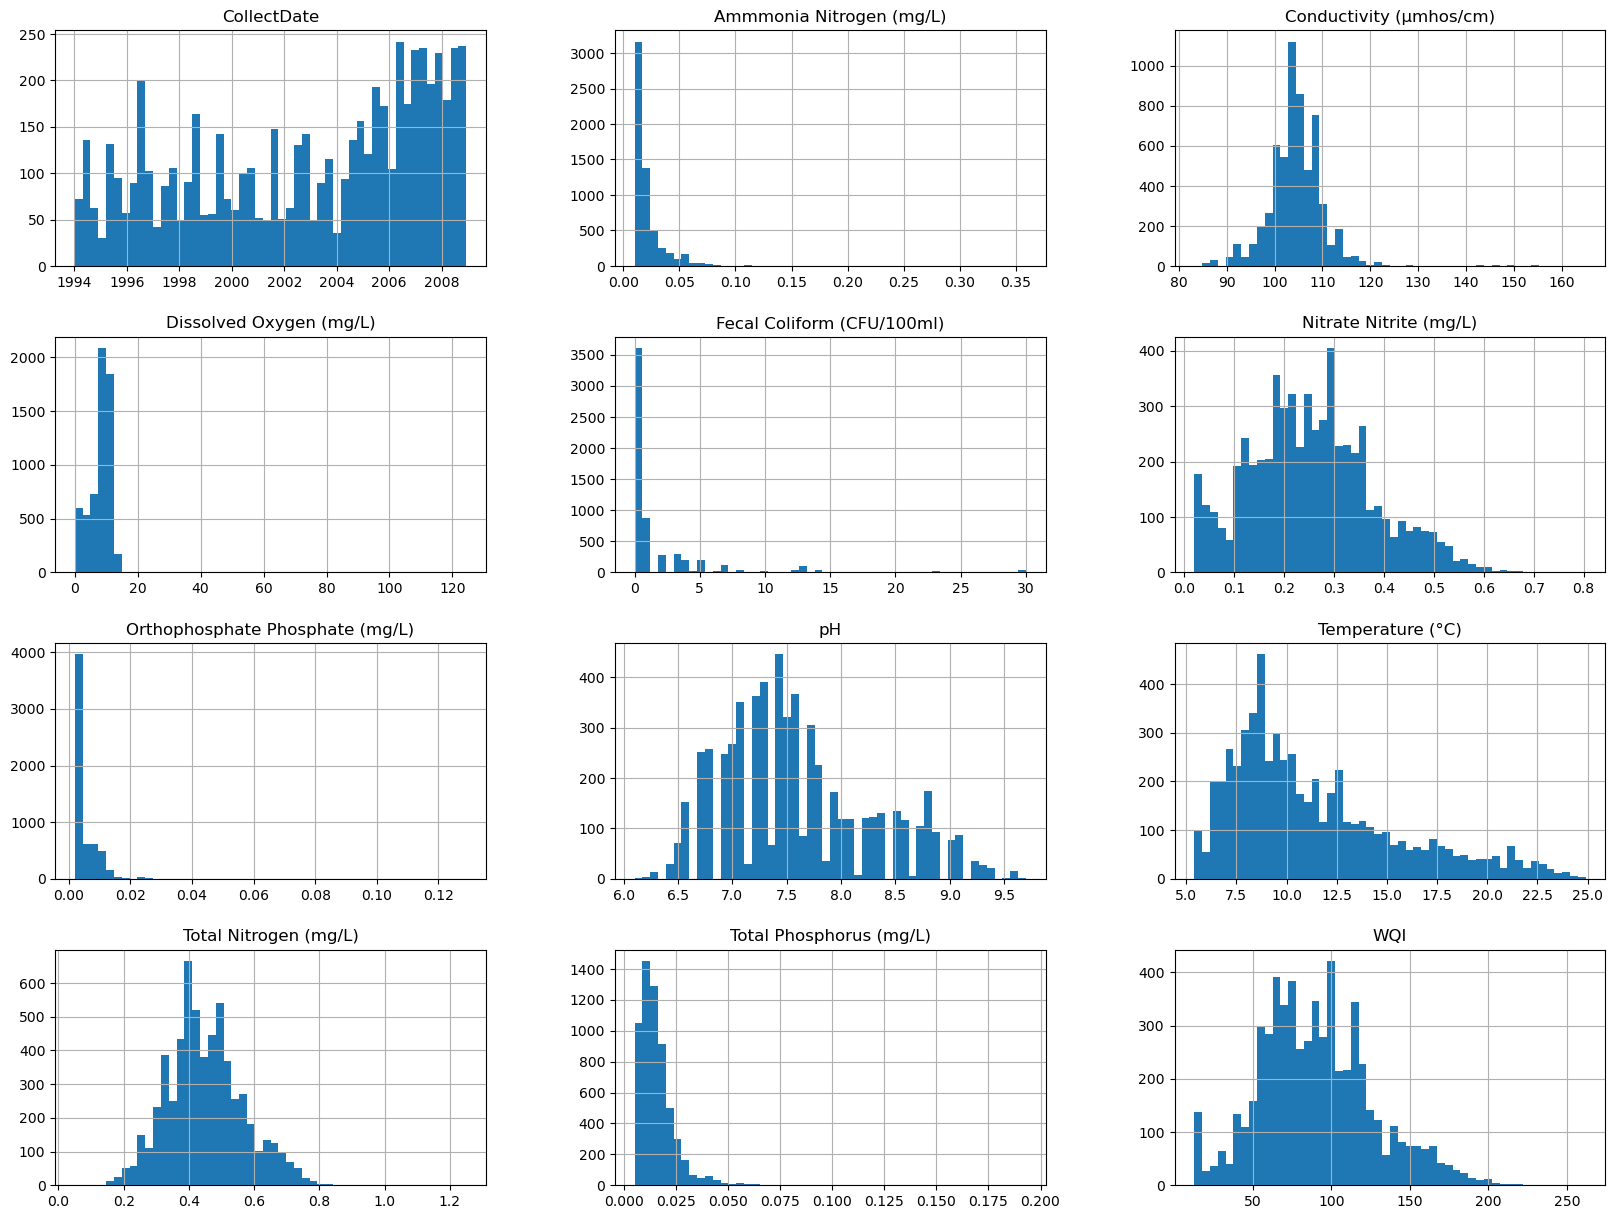

In [7]:
# Histogram shows the number of instances that have a given value range. Using jupyter's magic command to specify which backend Matplotlib should use.
%matplotlib inline
import matplotlib.pyplot as plt
WQI_df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: ylabel='Density'>

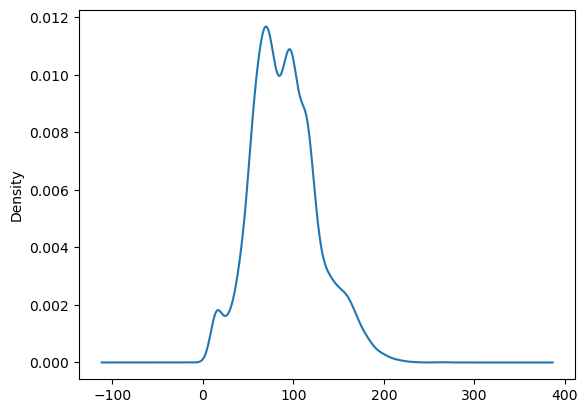

In [8]:
# Visualize the value counts of APPLICATION_TYPE

WQI_df["WQI"].plot.density()

In [9]:
WQI_df_mean = WQI_df.groupby(["CollectDate"]).mean()
WQI_df_mean.head(20)

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
CollectDate,,,,,,,,,,,
1994-01-06,0.020000,103.666667,9.128333,1.500000,0.285000,0.011000,7.400000,7.308333,0.428333,0.021333,100.729907
1994-02-14,0.020000,104.575000,10.633333,3.500000,0.306667,0.009167,7.400000,6.458333,0.503333,0.032333,110.775877
1994-03-08,0.020000,104.750000,10.742500,0.000000,0.343333,0.005333,7.525000,6.975000,0.546667,0.016000,116.975965
1994-03-22,0.020000,105.575000,11.762500,0.000000,0.320000,0.002333,8.008333,7.416667,0.535833,0.016333,110.156087
1994-04-05,0.020000,103.358333,12.429167,3.000000,0.305167,0.004733,8.316667,8.041667,0.499500,0.011000,104.168365
1994-04-19,0.020000,103.850000,12.080833,0.000000,0.288333,0.002000,8.550000,9.533333,0.481833,0.015500,100.459529
1994-05-03,0.020000,107.700000,10.812500,0.000000,0.290000,0.002000,8.175000,10.116667,0.468667,0.010833,99.425128
1994-05-24,0.020500,112.267857,10.262143,0.000000,0.277667,0.002000,8.225000,12.735714,0.434167,0.015667,97.358340
1994-06-07,0.020000,106.139394,9.120000,0.515152,0.241990,0.002000,7.633333,11.969697,0.439253,0.023515,88.673365


In [10]:
import seaborn as sns

In [11]:
# pip install seaborn

<AxesSubplot: >

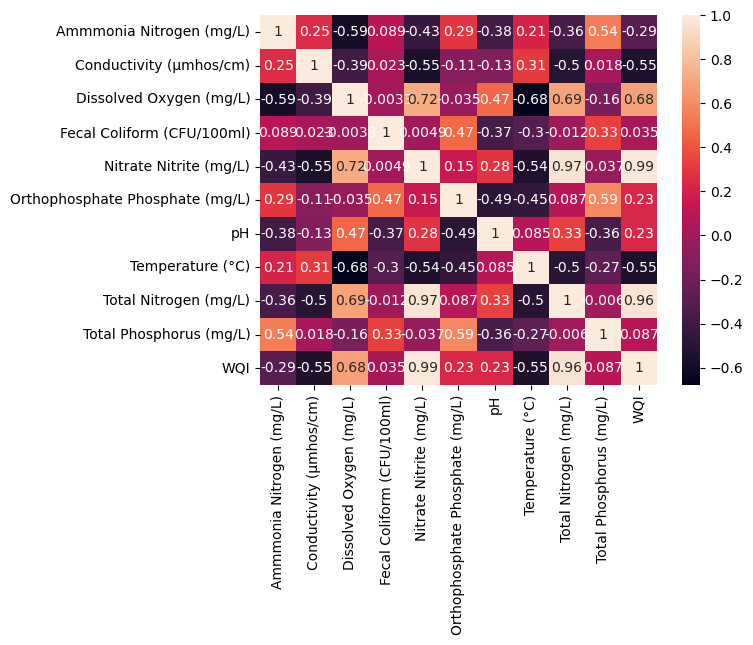

In [12]:
sns.heatmap(WQI_df_mean.corr(), annot=True)

In [13]:
# correlation among the features of each features in the data frame.

corr_matrix = WQI_df_mean.corr()
round(corr_matrix,2)

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
Ammmonia Nitrogen (mg/L),1.00,0.25,-0.59,0.09,-0.43,0.29,-0.38,0.21,-0.36,0.54,-0.29
Conductivity (µmhos/cm),0.25,1.00,-0.39,0.02,-0.55,-0.11,-0.13,0.31,-0.50,0.02,-0.55
Dissolved Oxygen (mg/L),-0.59,-0.39,1.00,-0.00,0.72,-0.03,0.47,-0.68,0.69,-0.16,0.68
Fecal Coliform (CFU/100ml),0.09,0.02,-0.00,1.00,0.00,0.47,-0.37,-0.30,-0.01,0.33,0.03
Nitrate Nitrite (mg/L),-0.43,-0.55,0.72,0.00,1.00,0.15,0.28,-0.54,0.97,-0.04,0.99
Orthophosphate Phosphate (mg/L),0.29,-0.11,-0.03,0.47,0.15,1.00,-0.49,-0.45,0.09,0.59,0.23
pH,-0.38,-0.13,0.47,-0.37,0.28,-0.49,1.00,0.09,0.33,-0.36,0.23
Temperature (°C),0.21,0.31,-0.68,-0.30,-0.54,-0.45,0.09,1.00,-0.50,-0.27,-0.55
Total Nitrogen (mg/L),-0.36,-0.50,0.69,-0.01,0.97,0.09,0.33,-0.50,1.00,-0.01,0.96
Total Phosphorus (mg/L),0.54,0.02,-0.16,0.33,-0.04,0.59,-0.36,-0.27,-0.01,1.00,0.09


In [14]:
# Looking for the correlations between WQI and rest of the features

corr_matrix = WQI_df_mean.corr()

round(corr_matrix["WQI"],2).sort_values(ascending=False)

WQI                                1.00
Nitrate Nitrite (mg/L)             0.99
Total Nitrogen (mg/L)              0.96
Dissolved Oxygen (mg/L)            0.68
Orthophosphate Phosphate (mg/L)    0.23
pH                                 0.23
Total Phosphorus (mg/L)            0.09
Fecal Coliform (CFU/100ml)         0.03
Ammmonia Nitrogen (mg/L)          -0.29
Conductivity (µmhos/cm)           -0.55
Temperature (°C)                  -0.55
Name: WQI, dtype: float64

In [24]:
%matplotlib inline

WQI_df_mean.scatterplot(figsize=(20,15), x=WQI_df_mean["WQI"], y=WQI_df_mean["Ammmonia Nitrogen (mg/L)", "Conductivity (µmhos/cm)", "Dissolved Oxygen (mg/L)", "Fecal Coliform (CFU/100ml)", "Nitrate Nitrite (mg/L)", "Orthophosphate Phosphate (mg/L)", "pH", "Temperature (°C)", "Total Nitrogen (mg/L)", "Total Phosphorus (mg/L)"])
plt.show()

AttributeError: 'DataFrame' object has no attribute 'scatterplot'

ValueError: x and y must be the same size

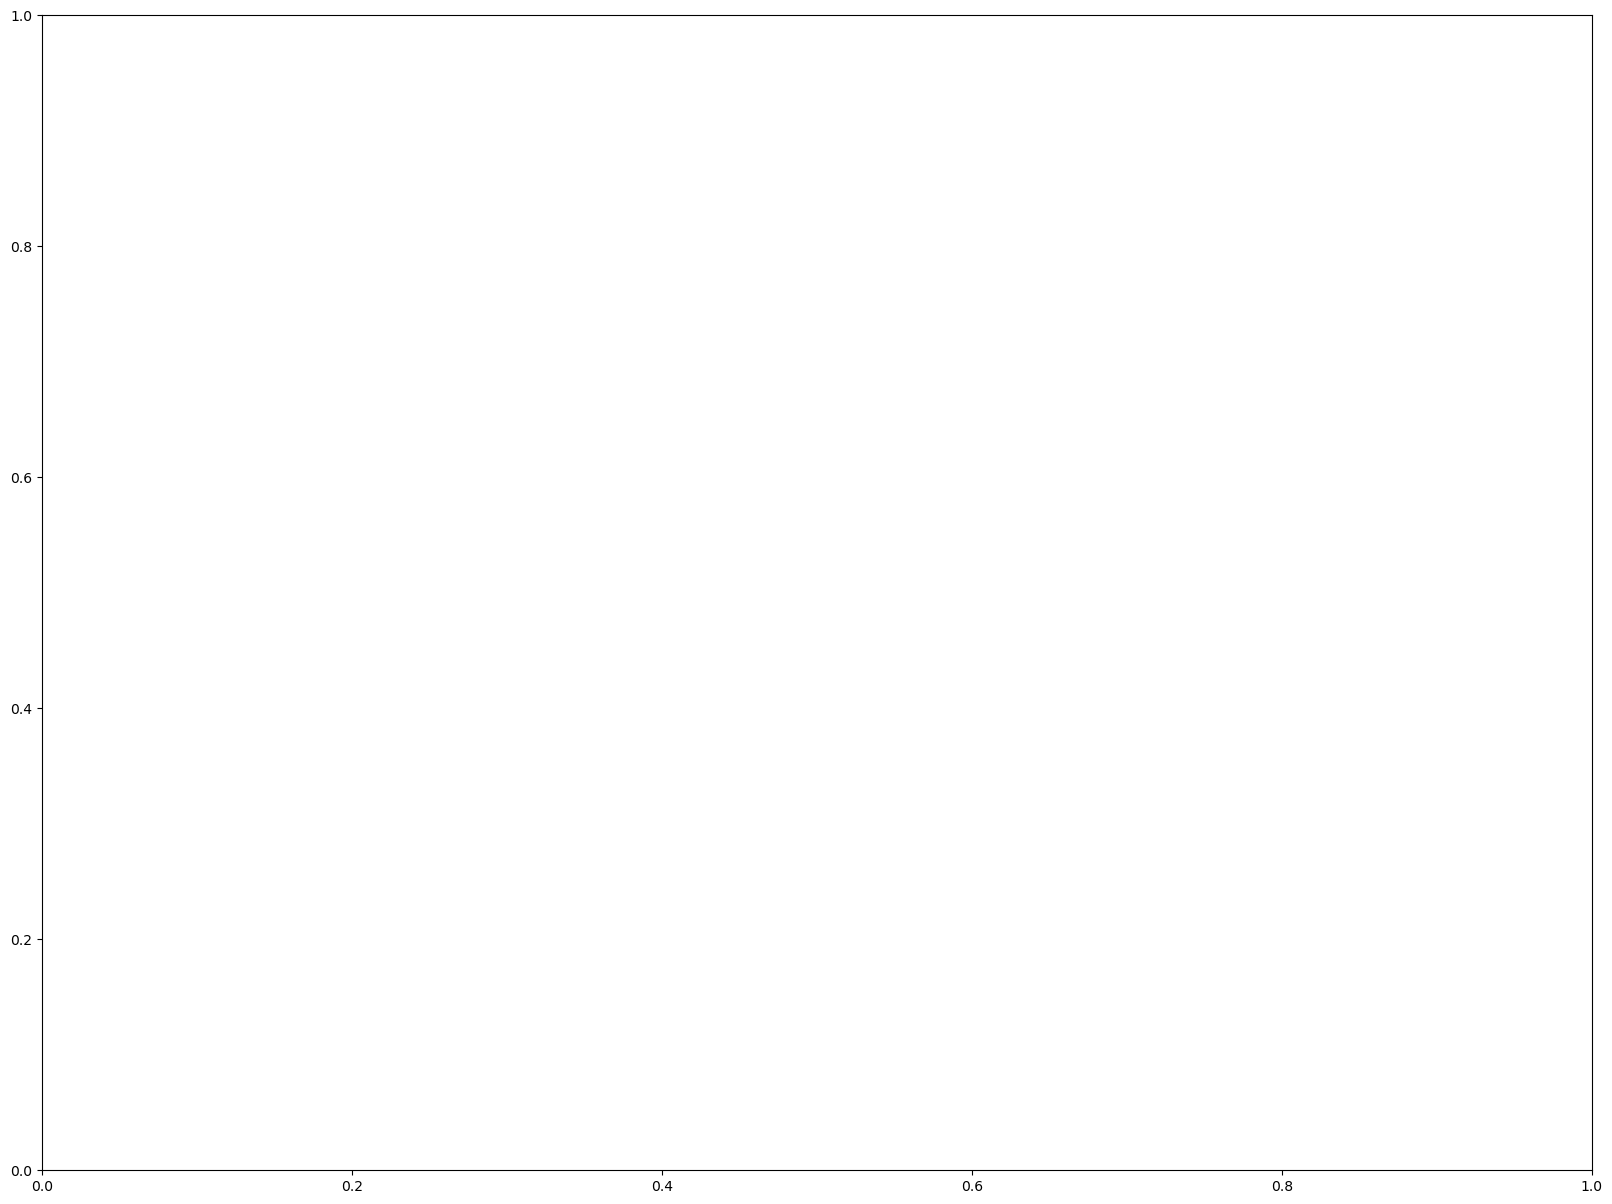

In [19]:

WQI_df_mean.plot(kind= "scatter",figsize=(20,15), x="WQI", y=["Ammmonia Nitrogen (mg/L)", "Conductivity (µmhos/cm)", "Dissolved Oxygen (mg/L)", "Fecal Coliform (CFU/100ml)", "Nitrate Nitrite (mg/L)", "Orthophosphate Phosphate (mg/L)", "pH", "Temperature (°C)", "Total Nitrogen (mg/L)", "Total Phosphorus (mg/L)"])
self._make_plot()

In [ ]:
from pandas.plotting import scatter_matrix
#attributes = ["Ammmonia Nitrogen (mg/L)", "Conductivity (µmhos/cm)", "Dissolved Oxygen (mg/L)", "Fecal Coliform (CFU/100ml)", "Nitrate Nitrite (mg/L)", "Orthophosphate Phosphate (mg/L)", "pH", "Temperature (°C)", "Total Nitrogen (mg/L)", "Total Phosphorus (mg/L)", "WQI"]
attributes = ["WQI"]
scatter_matrix(WQI_df_mean[attributes], figsize=(12,8))

In [ ]:
WQI_df_mean.plot(kind="scatter", x="Conductivity (µmhos/cm)", y="WQI")

In [ ]:
WQI_df_mean.plot(kind="scatter", x="Ammmonia Nitrogen (mg/L)", y="WQI")

In [ ]:
WQI_df.dtypes

In [ ]:
WQI_df_1 = WQI_df.drop(columns=["CollectDate"])
WQI_df.head()

In [ ]:
# dropping the features which are at weak correlation with WQI

WQI_df_2 = WQI_df_1.drop(columns=["Fecal Coliform (CFU/100ml)", "Total Phosphorus (mg/L)"])

In [ ]:


# Split our preprocessed data into our features and target arrays


y = WQI_df_2["WQI"].values
X = WQI_df_2.drop(["WQI"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 36
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

In [ ]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")